# PROPHET LIBRARY SAMPLE

In [18]:
# bu kısım onemli.. 
# literaturdeki kaynaklar eski versiyonu paylasıyor..hata almamak için bu kurulum önemli


pip install prophet pandas matplotlib plotly scikit-learn

SyntaxError: invalid syntax (953752994.py, line 5)

# Verinin içe aktarılması

In [1]:
import pandas as pd

path = 'https://raw.githubusercontent.com/jbrownlee/Datasets/master/monthly-car-sales.csv'
df = pd.read_csv(path, header=0)

print(df.shape)
print(df.head())

(108, 2)
     Month  Sales
0  1960-01   6550
1  1960-02   8728
2  1960-03  12026
3  1960-04  14395
4  1960-05  14587


# Verinin Görselleştirilmesi

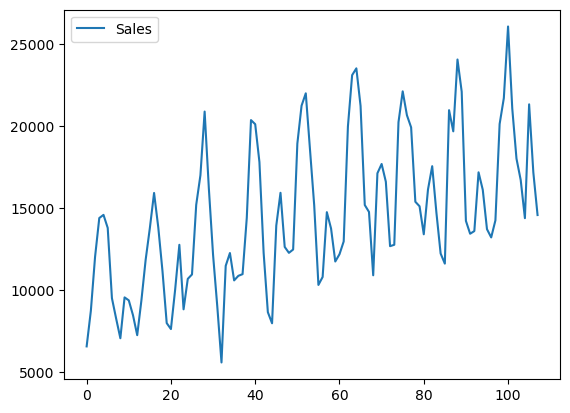

In [2]:
#veri analizinde önce mevsimseliğe bakalım, trend i görelim
# grafikte mevsimsellik ve trend var

from matplotlib import pyplot

df.plot()
pyplot.show()

# Veri Tipi Dönüşümü


In [3]:
df.dtypes

Month    object
Sales     int64
dtype: object

In [4]:
# columns tiplerini ve adlarını degiselim

df.columns = ['ds', 'y']
df['ds']= pd.to_datetime(df['ds'])

In [5]:
# model oluşturlım

from prophet import Prophet

model = Prophet()
model.fit(df)

11:34:42 - cmdstanpy - INFO - Chain [1] start processing
11:34:42 - cmdstanpy - INFO - Chain [1] done processing


# Ornek içi Tahmin yapalım

In [6]:

#urettiğimiz degerlere karşılık tahminler yaptıracağız
future = list()

for i in range(1, 13):
    date = '1968-%02d' % i
    future.append([date])
    
future = pd.DataFrame(future)
future.columns = ['ds']
future['ds']= pd.to_datetime(future['ds'])
forecast = model.predict(future)

In [7]:
 # tahmin tarih saat ds, tahmin degeri yhat, tahmin edilen deger,n sust ve alt sınırları da 'yhat_lower', 'yhat_upper

In [9]:
# 1 ocak, 1 şubat , 1 mart için tahminleri alıyoruz

rint(forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].head())

TypeError: int() argument must be a string, a bytes-like object or a number, not 'DataFrame'

# Tahminlerin çizdirilmesi

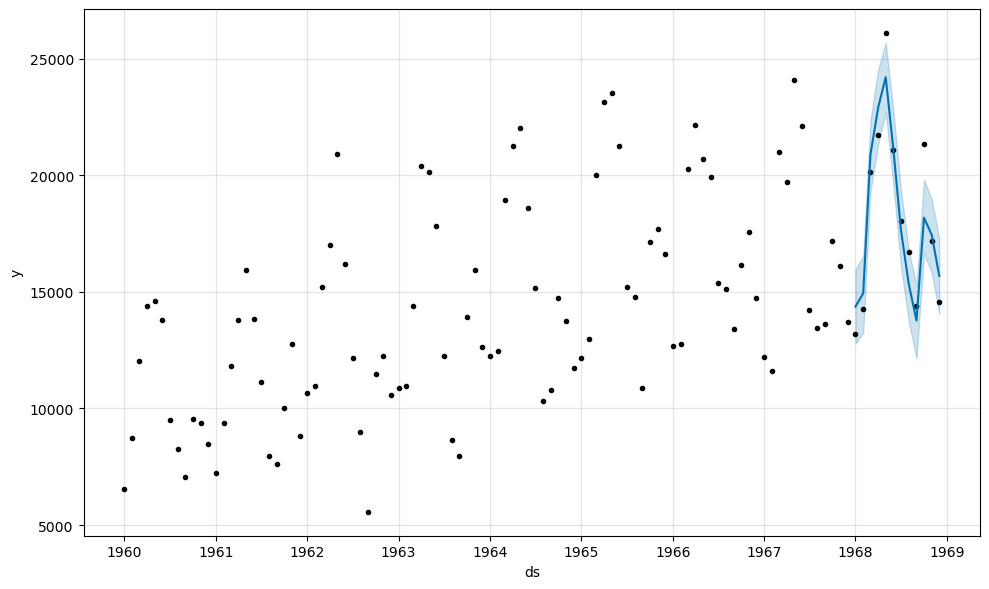

In [10]:
# tahmin edilen ve gerçek değerler var..
# hem sezonsallıgı hem de trendi yakaladı

model.plot(forecast)
pyplot.show()

          ds          yhat    yhat_lower    yhat_upper
0 1969-01-01  15425.481866  13874.788085  16909.365072
1 1969-02-01  16194.272433  14688.238922  17741.958526
2 1969-03-01  21393.067599  19775.151452  23025.374042
3 1969-04-01  23520.449776  21956.187368  25160.424564
4 1969-05-01  25028.910453  23459.538246  26581.828906


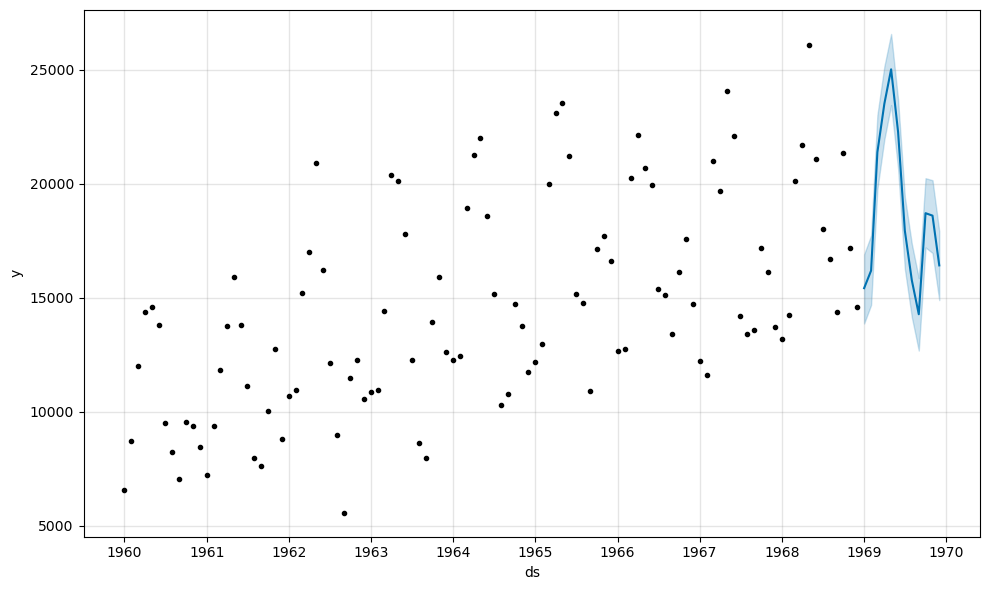

In [11]:
# burada da ornek dışı tahmin yapıyoruz..elimizdkei tüm datalardan 

future = list()

for i in range(1, 13):
    date = '1969-%02d' % i
    future.append([date])
    
future = pd.DataFrame(future)
future.columns = ['ds']
future['ds']= pd.to_datetime(future['ds'])

forecast = model.predict(future)
print(forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].head())

model.plot(forecast)
pyplot.show()

# Manuel degerlendirme

In [12]:
# elimizdeki son 1 yılın datasını çıkarıp ondan onceki yılların verisiyle datamızı eğitelim
# son 1 yılın verisini test datası şeklinde tahmin yaptıralım ve gerçek degerlerle tahmini degerleri karşılaştırlaım



In [13]:
import pandas as pd
from prophet import Prophet
from sklearn.metrics import mean_absolute_error
from matplotlib import pyplot

path = 'https://raw.githubusercontent.com/jbrownlee/Datasets/master/monthly-car-sales.csv'
df = pd.read_csv(path, header=0)

df.columns = ['ds', 'y']
df['ds']= pd.to_datetime(df['ds'])


In [14]:
# elimizdeki datanın son 1 yılını düşürelim.. 1968 yılı düştü

train = df.drop(df.index[-12:])
print(train.tail())

           ds      y
91 1967-08-01  13434
92 1967-09-01  13598
93 1967-10-01  17187
94 1967-11-01  16119
95 1967-12-01  13713


In [15]:
# 1968 yılı için tahminl yapalım ve modelş oluşturaup eğitelim

model = Prophet()
model.fit(train)    # 1967 ye kadar olan degerlerle fit ediyoruz

future = list()
for i in range(1, 13):
    date = '1968-%02d' % i
    future.append([date])
    
future = pd.DataFrame(future)
future.columns = ['ds']
future['ds'] = pd.to_datetime(future['ds'])

print('\n Maalesef verbose false yapamiyoruz :/ \n')
forecast = model.predict(future)

11:36:14 - cmdstanpy - INFO - Chain [1] start processing
11:36:15 - cmdstanpy - INFO - Chain [1] done processing



 Maalesef verbose false yapamiyoruz :/ 



In [16]:
#elimizdeki gerçek 1968 degerleri ile tahmin edilenleri kıyaslayacağız
y_true = df['y'][-12:].values
y_pred = forecast['yhat'].values

In [17]:
# pred ve actual deger kıyası için MAE yi kullanalım.. ortalama hata

mae = mean_absolute_error(y_true, y_pred)
print('MAE: %.3f' % mae)

MAE: 1336.813


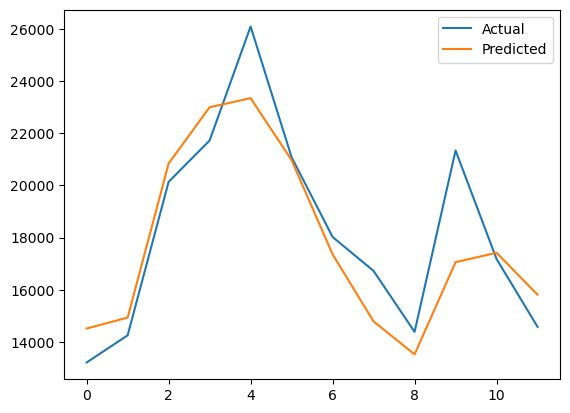

In [18]:
pyplot.plot(y_true, label='Actual')
pyplot.plot(y_pred, label='Predicted')
pyplot.legend()
pyplot.show()

# son 1 yıl içindeki değerlerle tahmin edilen değerleri kıyasladık
# hem sezonsallığı hem de trendi yakalamış görünüyor